In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Olympiako'
raceDate = '30/4/2023'
surface = 'Gravel'
competition = 'Championship'

link = 'https://www.ewrc-results.com/results/83688-olympiako-rally-2023/?s='
startat, no_ss=421726, int(6)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [3]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#1,Tsouloftas Ale,C1,7:14.49,-,101.7,1,Olympiako,30/4/2023,Gravel,Championship,1
1,2,#3,Papadimitriou,C1,7:20.12,+5.63 + 5.63,100.4 0.46,1,Olympiako,30/4/2023,Gravel,Championship,2
2,3,#2,Kehagias Giorg,C1,7:32.85,+18.36 + 12.73,97.6 1.50,1,Olympiako,30/4/2023,Gravel,Championship,3
3,4,#5,Badounas I. -,C2,7:41.26,+26.77 + 8.41,95.8 2.18,1,Olympiako,30/4/2023,Gravel,Championship,4
4,5,#8,Kirkos Panagio,C2,7:52.31,+37.82 + 11.05,93.6 3.08,1,Olympiako,30/4/2023,Gravel,Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,#14,Yiangou Y. -,C2,12:59.52,+3:04.79 + 8.09,56.1 15.2,6,Olympiako,30/4/2023,Gravel,Championship,28
28,29,#40,Bris Panagioti,C3 F2,13:11.69,+3:16.96 + 12.17,55.2 16.2,6,Olympiako,30/4/2023,Gravel,Championship,29
29,30,#39,Kalaitzian I.,C3 F2,13:29.84,+3:35.11 + 18.15,54.0 17.7,6,Olympiako,30/4/2023,Gravel,Championship,30
30,31,#42,Koutsoukos Ang,C4 F2,13:45.85,+3:51.12 + 16.01,52.9 19.0,6,Olympiako,30/4/2023,Gravel,Championship,31


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [9]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Tsouloftas Ale,C1,1,Olympiako,30/4/2023,Gravel,Championship,1,434.49
1,Papadimitriou,C1,1,Olympiako,30/4/2023,Gravel,Championship,2,440.12
2,Kehagias Giorg,C1,1,Olympiako,30/4/2023,Gravel,Championship,3,452.85
3,Badounas I. -,C2,1,Olympiako,30/4/2023,Gravel,Championship,4,461.26
4,Kirkos Panagio,C2,1,Olympiako,30/4/2023,Gravel,Championship,5,472.31
...,...,...,...,...,...,...,...,...,...
27,Yiangou Y. -,C2,6,Olympiako,30/4/2023,Gravel,Championship,28,779.52
28,Bris Panagioti,C3 F2,6,Olympiako,30/4/2023,Gravel,Championship,29,791.69
29,Kalaitzian I.,C3 F2,6,Olympiako,30/4/2023,Gravel,Championship,30,809.84
30,Koutsoukos Ang,C4 F2,6,Olympiako,30/4/2023,Gravel,Championship,31,825.85


In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race      ss          
Olympiako 1     434.49
          2     610.18
          3     429.57
          4     602.36
          5     604.92
          6     594.73

In [11]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Olympiako,30/4/2023,Gravel,Championship,1,434.49,434.49,0.00,0.000000,01
1,Papadimitriou,C1,1,Olympiako,30/4/2023,Gravel,Championship,2,440.12,434.49,5.63,1.295772,01
2,Kehagias Giorg,C1,1,Olympiako,30/4/2023,Gravel,Championship,3,452.85,434.49,18.36,4.225644,01
3,Badounas I. -,C2,1,Olympiako,30/4/2023,Gravel,Championship,4,461.26,434.49,26.77,6.161247,01
4,Kirkos Panagio,C2,1,Olympiako,30/4/2023,Gravel,Championship,5,472.31,434.49,37.82,8.704458,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,Yiangou Y. -,C2,6,Olympiako,30/4/2023,Gravel,Championship,28,779.52,594.73,184.79,31.071242,06
214,Bris Panagioti,C3 F2,6,Olympiako,30/4/2023,Gravel,Championship,29,791.69,594.73,196.96,33.117549,06
215,Kalaitzian I.,C3 F2,6,Olympiako,30/4/2023,Gravel,Championship,30,809.84,594.73,215.11,36.169354,06
216,Koutsoukos Ang,C4 F2,6,Olympiako,30/4/2023,Gravel,Championship,31,825.85,594.73,231.12,38.861332,06


In [12]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Tsouloftas Ale,C1,1,Olympiako,30/4/2023,Gravel,Championship,1,434.49,434.49,0.00,0.000000,01
1,Papadimitriou,C1,1,Olympiako,30/4/2023,Gravel,Championship,2,440.12,434.49,5.63,1.295772,01
2,Kehagias Giorg,C1,1,Olympiako,30/4/2023,Gravel,Championship,3,452.85,434.49,18.36,4.225644,01
3,Badounas I. -,C2,1,Olympiako,30/4/2023,Gravel,Championship,4,461.26,434.49,26.77,6.161247,01
4,Kirkos Panagio,C2,1,Olympiako,30/4/2023,Gravel,Championship,5,472.31,434.49,37.82,8.704458,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Simetra - Pal,C2,6,Olympiako,30/4/2023,Gravel,Championship,14,705.32,594.73,110.59,18.594993,06
200,Theocharopoulo,C2,6,Olympiako,30/4/2023,Gravel,Championship,15,708.84,594.73,114.11,19.186858,06
208,Davaris Nikos,C2,6,Olympiako,30/4/2023,Gravel,Championship,23,725.70,594.73,130.97,22.021758,06
209,Zounis Ioannis,C2,6,Olympiako,30/4/2023,Gravel,Championship,24,730.82,594.73,136.09,22.882653,06


In [13]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Olympiako                                        
SS.                   01      02      03      04      05      06
Crew                                                            
Badounas I.  -     26.77   21.16   32.72   26.56   25.11   42.32
Christodoulou     119.02     NaN     NaN     NaN     NaN     NaN
Davaris Nikos     103.25  109.09  113.37  112.70   97.39  130.97
Eliopoulos Pan     73.37   63.27   66.38   70.00   69.91     NaN
Giannakopoulos     80.95   85.37   85.75   80.95   77.92  101.58
Kehagias Giorg     18.36   13.05    6.79    7.90   27.46   35.99
Kirkos Panagio     37.82   34.00   28.68   31.34   19.53   53.80
Lainopoulos St     58.40   70.27     NaN     NaN     NaN     NaN
Lymperis A.  -     81.21   66.62   76.09   81.48   84.87     NaN
Panteli Petros     40.31   75.33   29.97   25.27     NaN     NaN
Papadimitriou       5.63   12.58     NaN     NaN     NaN     NaN
Papadopoulos A     67.11   56.56   55.38  342.36   67.17   61.52
Simetra  - Pal    102.37  111.42   89.69  106.85  102.95  110.59
Theocharopoulo     80.94   78.25   78.54   73.70   72.12  114.11
Tsetsonis Elia     75.92   77.50   51.87   72.58   82.54   84.25
Tsouloftas Ale      0.00    0.00    0.00    0.00    0.00    0.00
Tsoulos Argiri     73.96   63.19   75.13   72.78   77.92   72.79
Tzemos Konstan     63.75   56.76   48.54   48.78   44.80   62.92
Yiangou Y.  -     165.12  161.37  137.46  143.69  147.31  184.79
Zounis Ioannis     97.50   94.19   93.02  107.08  107.41  136.09

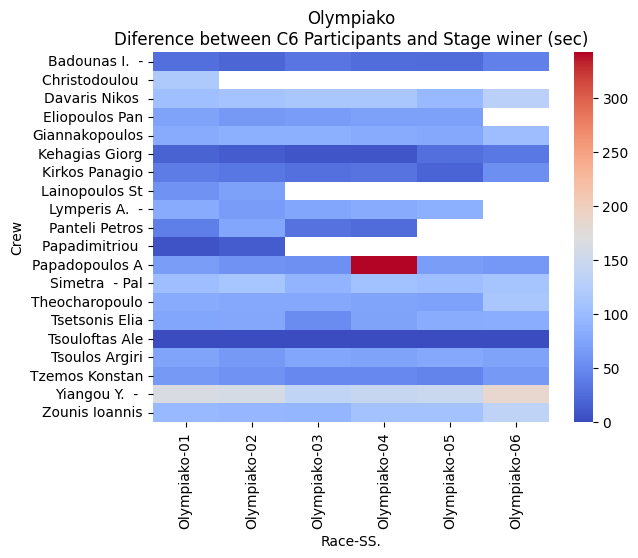

In [14]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C6 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

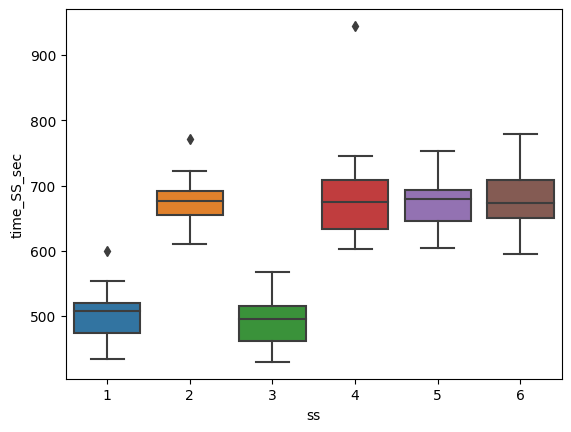

In [15]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

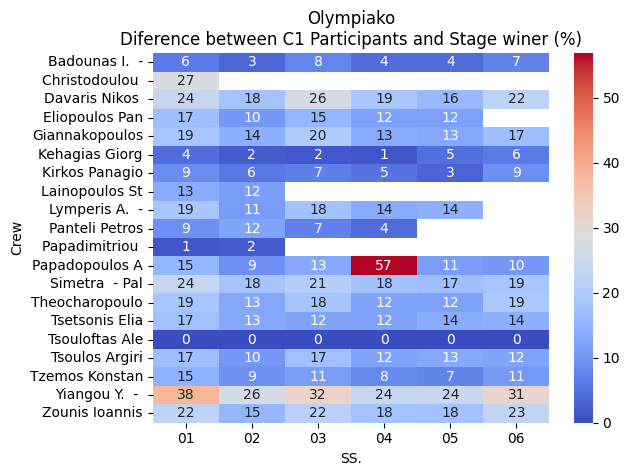

In [16]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")